### Looking at the site canonicality for novel UTRons

Used cgat script gtf2gtf.py with options to output splice information

Analysed splice info of a GTF file that contained the 3' UTRs of all the novel UTRons by taking the last 2 exons of every gene


    (e.g.)Original novel utrons gtf □---□□□□□□□□□□  
          Filtered novel Utrons gtf ----□□□---□□□□ 
          
          
Results were outputted to a text file on the shared folder which has the info for the 3 types of known splice sites and a column for unknown splice sites

Also found utron lengths of all the genes (from lengths notebook)

In [1]:
import pandas as pd
import math
import sqlite3
import numpy

Get length and splice info into a merged dataframe for each transcript

In [2]:
spliceInfo = pd.read_csv("/shared/sudlab1/General/projects/utrons_project/misc_files/SpliceSite/spliceAnalysis.txt", sep="\t")
lengthInfo = pd.read_csv("/shared/sudlab1/General/projects/utrons_project/misc_files/SpliceSite/novelLengths.txt", sep="\t")
spliceInfo = pd.merge(spliceInfo, lengthInfo, left_on="transcript_id", right_on="transcript_id")
spliceInfo[0:5]

,transcript_id,U2-GT/AG,U2-nc-GC/AG,U12-AT/AC,unknown,Length
0,MSTRG.10103.1,0,0,0,1,83
1,MSTRG.10204.4,0,0,0,1,47
2,MSTRG.1023.20,0,1,0,0,42
3,MSTRG.1024.1,0,1,0,0,53
4,MSTRG.1024.11,0,1,0,0,137


In [3]:
# Find the percentages of known and unknown sites for a range of length thresholds
knownPercents = []
unknownPercents = []
canonicalPercents = []
lengthRange = range(25,5000,1)
for length in lengthRange:
    
    # get a dataframe of just the values corresponding to >= length value
    lengthValues = spliceInfo[spliceInfo["Length"]>=length]
    numTxs = len(lengthValues)
    
    # get percentages at known / unknwon sites
    canonicalSite = float(len(lengthValues[lengthValues["U2-GT/AG"]==1])) / numTxs
    unknownSite =  float(len(lengthValues[lengthValues["unknown"]==1])) / numTxs
    knownSite =  float(len(lengthValues[lengthValues["unknown"]!=1])) / numTxs
    
    # Append percentage to list
    knownPercents.append(knownSite)
    unknownPercents.append(unknownSite)
    canonicalPercents.append(canonicalSite)

Populating the interactive namespace from numpy and matplotlib


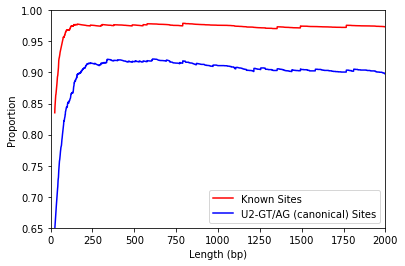

In [5]:
%pylab inline
pylab.plot(lengthRange, knownPercents, color="red", label="Known Sites")
pylab.plot(lengthRange, canonicalPercents, color="blue", label="U2-GT/AG (canonical) Sites")

pylab.ylim(0.65, 1.0)
pylab.xlim(0,2000)
pylab.legend()

pylab.xlabel("Length (bp)")
pylab.ylabel("Proportion")

pylab.savefig("./images/4_CanonicalVsLength", dpi=300)

Populating the interactive namespace from numpy and matplotlib


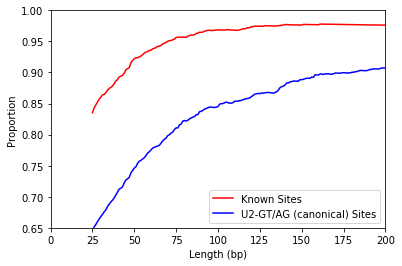

In [6]:
%pylab inline

pylab.plot(lengthRange, knownPercents, color="red", label="Known Sites")
pylab.plot(lengthRange, canonicalPercents, color="blue", label="U2-GT/AG (canonical) Sites")

pylab.ylim(0.65, 1.0)
pylab.xlim(0,200)
pylab.legend()

pylab.xlabel("Length (bp)")
pylab.ylabel("Proportion")

pylab.savefig("./images/4_CanonicalVsLength_Zoomed", dpi=300)

At short lengths the percent at non-canonical sites is fairly high - this elvels off at ~200 bp

Poss that <200bp utrons are less likely to be real

Below - outputting lists of utron ids which are known / unknown at various lengths

In [13]:
def writeFiles(Length):
    a = spliceInfo[spliceInfo["Length"]<=Length]
    b1 = a[a["unknown"]==1].ix[:,0]
    b2 = a[a["unknown"]!=1].ix[:,0]

    unknownFile = "/shared/sudlab1/General/projects/utrons_project/misc_files/SpliceSite/novelUtrons_unknown_%dbp.txt" % Length
    knownFile = "/shared/sudlab1/General/projects/utrons_project/misc_files/SpliceSite/novelUtrons_known_%dbp.txt" % Length
    b1.to_csv(unknownFile, header=None, sep="\t")
    b2.to_csv(knownFile, header=None, sep="\t")

writeFiles(75)
writeFiles(100)
writeFiles(200)
writeFiles(300)
writeFiles(100000)

In [37]:
length = 100
x = spliceInfo[spliceInfo["Length"]<=length]
f = float(len(x))
print x["U2-GT/AG"].sum() /f , x["U2-nc-GC/AG"].sum() / f, x["U12-AT/AC"].sum()/ f, x["unknown"].sum()/ f

0.465892597968 0.198113207547 0.0435413642961 0.292452830189
